<a href="https://colab.research.google.com/github/karuna3laka/Sentimental-Analyzing-for-Texts/blob/main/Sentimental_Analiziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing Sentimental analizis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Changed 'stlye' to 'style'
plt.style.use('ggplot')

import nltk


In [2]:
import pandas as pd

df = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip', quoting=3)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
print(df.shape)
df.head()

(5419, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


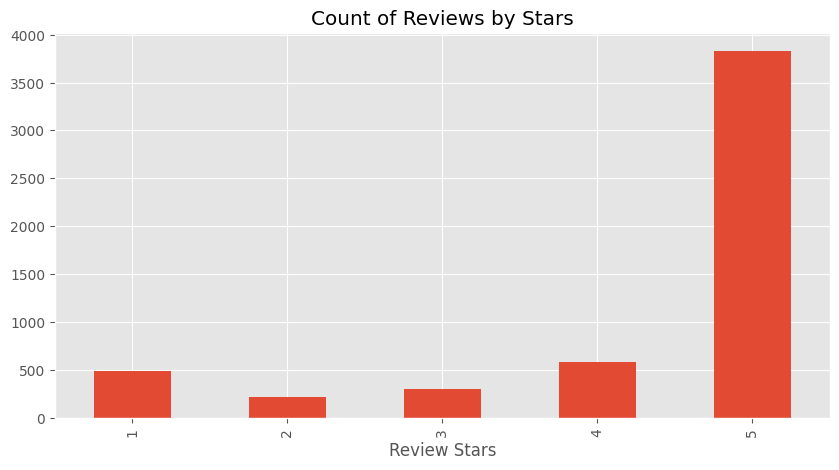

In [5]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [6]:
sample=df['Text'][34]
print(sample)

What a nice alternative to an apple pie. Love the fact there was no slicing and dicing. Easy to prepare. I also loved the fact that you can make them fresh whenever needed.


In [7]:
sample2=df['Text'][374]
print(sample2)

The price is pretty good given that local stores sell one bottle for almost $4. Don't know why the price on this has gone up though.


negative sentiments


In [8]:
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Now, try tokenizing the text and assign the result to 'tokens'
tokens = nltk.word_tokenize(sample2)

tokens[:10] # Now 'tokens' is defined and can be sliced


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['The',
 'price',
 'is',
 'pretty',
 'good',
 'given',
 'that',
 'local',
 'stores',
 'sell']

In [9]:
import nltk

# Download the required resource
nltk.download('averaged_perceptron_tagger_eng')

# Now, try using pos_tag again
tagged=nltk.pos_tag(tokens)

tagged[:10] #printing first 10

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('The', 'DT'),
 ('price', 'NN'),
 ('is', 'VBZ'),
 ('pretty', 'JJ'),
 ('good', 'JJ'),
 ('given', 'VBN'),
 ('that', 'IN'),
 ('local', 'JJ'),
 ('stores', 'NNS'),
 ('sell', 'VBP')]

***APPLYING VADOR MODEL***




In [15]:
import nltk

nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [16]:
sia.polarity_scores('i like donut')

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [28]:
sia.polarity_scores('I DONT LIKE YOU')

{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

In [18]:
sia.polarity_scores('Happy new Year!')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}

# **sample is a thing inside the data set**


> sample
sample 2




In [19]:
sia.polarity_scores(sample)

{'neg': 0.051, 'neu': 0.577, 'pos': 0.372, 'compound': 0.9313}

In [20]:
df


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
...,...,...,...,...,...,...,...,...,...,...
5414,20153,B0019QG5CG,A1XS3IFXAQ32U9,Nick,0,0,1,1350518400,Nothing like it,"""Ok for one the bonsai tree was only 3"""" tall ..."
5415,20154,B0019QG5CG,A2M1CTT1G971NQ,"""Donald R. Tjossem """"Longbranch Trading Compan...",0,0,5,1348963200,Juniper Tree Bonsai - Exceeded expectations!,This little Juniper Tree Bonsai exceeded my ex...
5416,20156,B0019QG5CG,A110JRCYDJJ9ZH,Joe,0,0,2,1346630400,Don't buy unless you know you what your getting!,The first picture of this was very deceiving. ...
5417,20157,B0019QG5CG,A3AHM487FQS6Q7,k1983,0,0,1,1344384000,unhappy,The bonsai I got looked nothing like the one I...


# **RUN THE POLARITY TO WHOLE DATASET**

Comments are form Gemini and explaining

In [21]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    # Check if 'text' is a string before processing it
    if isinstance(text, str):
        res[myid] = sia.polarity_scores(text)
    else:
        # Handle missing or non-string values (e.g., skip or assign a default sentiment)
        # Here, we're skipping non-string values:
        print(f"Skipping row {myid} due to invalid text type: {type(text)}")
        # You could also assign default sentiment scores:
        # res[myid] = {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


  0%|          | 0/5419 [00:00<?, ?it/s]

In [22]:
vaders=pd.DataFrame(res).T

# T --> swapping the rows and columns


# Merge Processed Data With Existing Dataset

In [23]:
vaders=pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [24]:
vaders.head()
#now we have sentimental score and metadata


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


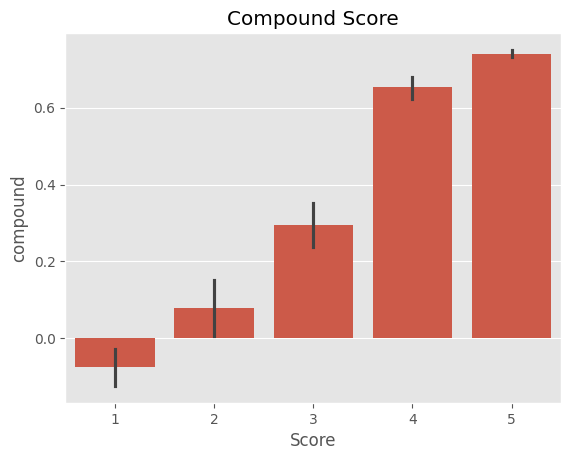

In [25]:
ax=sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title("Compound Score")
plt.show()

# wht i was done before is see how the stars they gave and the vibe of the comment wuld **change**


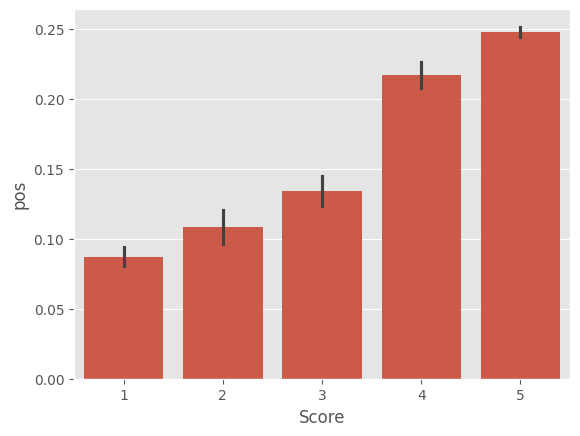

In [26]:
sns.barplot(data=vaders, x='Score', y='pos')
plt.show()

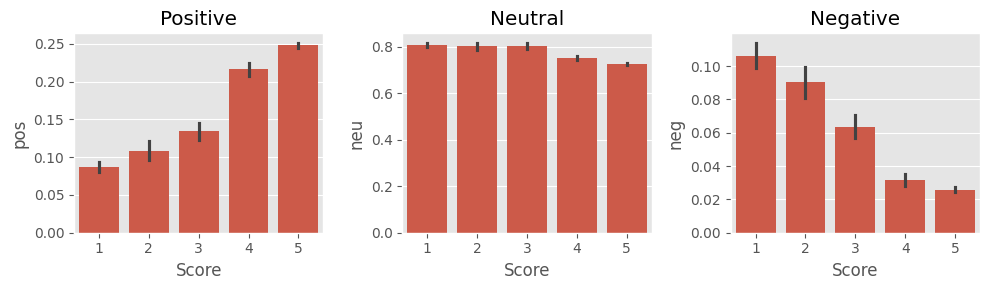

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

plt.show()

#1, 3 specifies one row and three columns of subplots.
#figsize=(12,3) sets the figure size to 12 inches wide and 3 inches tall.


***VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis model. It uses a predefined lexicon to evaluate text for positive, negative, and neutral sentiments. Optimized for informal text like social media, VADER accounts for punctuation, capitalization, and negations, outputting sentiment probabilities and a compound score (-1 to 1).***

#USING RoBERTa (Robustly Optimized BERT Pretraining Approach) is a pretrained transformer model for natural language processing. It builds upon BERT by optimizing training strategies, including:

Larger Training Data: Trained on more diverse and larger datasets.
No Next Sentence Prediction (NSP): NSP task from BERT is removed, focusing solely on masked language modeling.
Larger Batch Sizes and Learning Rates: Uses better hyperparameters for training.
Dynamic Masking: Masked tokens are generated dynamically during training, improving efficiency.

In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

#TESTING ROBERTA MODEL

In [33]:
#ROBERTA
encoded_text = tokenizer(sample, return_tensors='pt') #sample is the input text
output = model(**encoded_text)                        # pass the tokenized data to the model
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)




{'roberta_neg': 0.0038570915, 'roberta_neu': 0.013474421, 'roberta_pos': 0.9826685}


# wht I done ..>
1.tokenizer convert text --> tokensIDs creating attention marks

2.return_tensor='pt' return data as PyTorch which are requred bu the model

3.output[0][0] = Accesses the first set of logits for the input.

4.detach() =Detaches the tensor from the computational graph to prevent gradient computation.

5.numpy(): Converts the tensor into a NumPy array for easier manipulation.

6.softmax(scores): Ensures that the scores sum to 1, representing the likelihood of each sentiment class (negative, neutral, positive).


# Apply to whole **dataset**